# Кредитный скоринг


Кредитный скоринг — система оценки кредитоспособности (кредитных рисков) лица, основанная на численных статистических методах. Как правило, используется в потребительском (магазинном) экспресс-кредитовании на небольшие суммы. Также возможно его использование в бизнесе сотовых операторов, страховых компаний и т. д. Скоринг заключается в присвоении баллов по заполнению некой анкеты, разработанной оценщиками кредитных рисков андеррайтерами. По результатам набранных баллов системой принимается решение об одобрении или отказе в выдаче кредита.

## Часть 1


Кредитный скоринг - это задача классификации, ведь нам нужно дать ответ вернет заемщик кредит или нет.

Я взял дата сет с соревнованя на Kaggle: https://www.kaggle.com/uciml/german-credit

In [13]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
#импорт датасета
df_credit = pd.read_csv("german_credit_data.csv",index_col=0)

In [14]:
#выведим количество уникальных данных в каждом столбце
print(df_credit.nunique())
#посмотрим на данные 
print(df_credit.head())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64
   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


### Описание датасета:

- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
- Risk (Value target - Good or Bad Risk)

In [7]:
#посмотрим типы
df_credit.dtypes.sort_values()

Age                  int64
Job                  int64
Credit amount        int64
Duration             int64
Sex                 object
Housing             object
Saving accounts     object
Checking account    object
Purpose             object
Risk                object
dtype: object

In [8]:
#первично проанализаруем данные
df_credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [9]:
# узнаем количество строк
print("Датасет состоит из {rows} строк.".format(rows = len(df_credit)))

Датасет состоит из 1000 строк.


In [12]:
#выведим информацию о дтасете, чтобы увидеть есть ли пропущенные значения
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


Поскольку в датасете есть пропуски, я заменю их на наиболее часще встречающиеся значения

In [15]:
categoricals = ['Checking account','Saving accounts']

for num in categoricals :
    modus=df_credit[num].mode().values[0]
    df_credit[num] = df_credit[num].fillna(modus)

df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


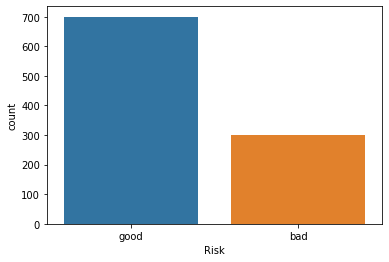

In [17]:
sns.countplot(x='Risk',data=df_credit)